# Forcasting the stock Market Using Machine Learning and Deep Learning

# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# Load the Data

In [2]:
# get the data from Yahoofinance for multiple stocks
df=yf.download("AMZN", start="2000-01-01", end="2020-08-28") # downloading amazon stock price

[*********************100%***********************]  1 of 1 completed


# Data Exploration

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,81.5000,89.5625,79.046875,89.3750,89.3750,16117600
2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400
2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400
2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000
2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-21,3295.000000,3314.399902,3275.389893,3284.719971,3284.719971,3575900
2020-08-24,3310.149902,3380.320068,3257.560059,3307.459961,3307.459961,4666300
2020-08-25,3294.989990,3357.399902,3267.000000,3346.489990,3346.489990,3992800
2020-08-26,3351.110107,3451.739990,3344.570068,3441.850098,3441.850098,6508700
2020-08-27,3450.050049,3453.000000,3378.000000,3400.000000,3400.000000,4264800


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,81.500000,89.562500,79.046875,89.375000,89.375000,16117600
2000-01-04,85.375000,91.500000,81.750000,81.937500,81.937500,17487400
2000-01-05,70.500000,75.125000,68.000000,69.750000,69.750000,38457400
2000-01-06,71.312500,72.687500,64.000000,65.562500,65.562500,18752000
2000-01-07,67.000000,70.500000,66.187500,69.562500,69.562500,10505400
...,...,...,...,...,...,...
2020-08-21,3295.000000,3314.399902,3275.389893,3284.719971,3284.719971,3575900
2020-08-24,3310.149902,3380.320068,3257.560059,3307.459961,3307.459961,4666300
2020-08-25,3294.989990,3357.399902,3267.000000,3346.489990,3346.489990,3992800


In [6]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5197 entries, 2000-01-03 to 2020-08-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5197 non-null   float64
 1   High       5197 non-null   float64
 2   Low        5197 non-null   float64
 3   Close      5197 non-null   float64
 4   Adj Close  5197 non-null   float64
 5   Volume     5197 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 284.2 KB


# Get the date as the variable name

In [8]:
df.reset_index(inplace = True)

In [9]:
# check again if date is the variable nae
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5197 non-null   datetime64[ns]
 1   Open       5197 non-null   float64       
 2   High       5197 non-null   float64       
 3   Low        5197 non-null   float64       
 4   Close      5197 non-null   float64       
 5   Adj Close  5197 non-null   float64       
 6   Volume     5197 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 284.3 KB


In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,81.5000,89.5625,79.046875,89.3750,89.3750,16117600
1,2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400
2,2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400
3,2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000
4,2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400


# Check Missing Values

In [12]:
df.isnull().sum().sort_values(ascending=False)

Volume       0
Adj Close    0
Close        0
Low          0
High         0
Open         0
Date         0
dtype: int64

* No null values. Great!

# Select Columns

In [13]:
df=df[['Date', 'Adj Close']]

In [14]:
df

,Date,Adj Close
0,2000-01-03,89.375000
1,2000-01-04,81.937500
2,2000-01-05,69.750000
3,2000-01-06,65.562500
4,2000-01-07,69.562500
...,...,...
5192,2020-08-21,3284.719971
5193,2020-08-24,3307.459961
5194,2020-08-25,3346.489990
5195,2020-08-26,3441.850098


In [15]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-15-182e23b44254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


In [16]:
df['Adj Close'].describe()

count    5197.000000
mean      426.614788
std       630.574775
min         5.970000
25%        41.360001
50%       129.259995
75%       438.559998
max      3441.850098
Name: Adj Close, dtype: float64

# Visualize the Adj Close Price

In [17]:
df.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

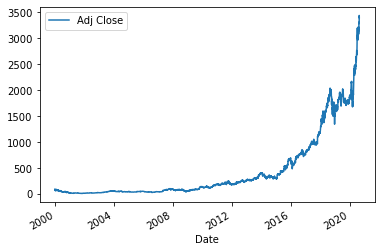

In [18]:
df.plot()

In [20]:
df1=df.reset_index()['Adj Close']

# Data Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

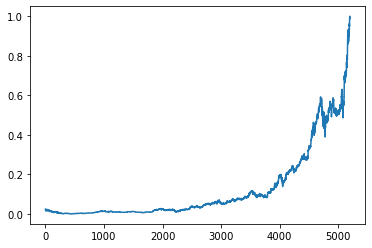

In [22]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [23]:
import numpy as np

In [24]:
print(df1)

[[0.02427471]
 [0.02211006]
 [0.01856293]
 ...
 [0.9722458 ]
 [1.        ]
 [0.98781969]]


# Train-Test Split

In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(3378, 1819)

In [27]:
train_data

array([[0.02427471],
       [0.02211006],
       [0.01856293],
       ...,
       [0.07602128],
       [0.07621337],
       [0.07884443]])

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(3277, 100)
(3277,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(1718, 100)
(1718,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Training the Deep Learning Model: Artificail Neural Network--Long Short-Term Memory (LSTM)

In [33]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
52/52 [==============================] - 14s 276ms/step - loss: 1.1754e-04 - val_loss: 0.0020
Epoch 2/100
52/52 [==============================] - 11s 204ms/step - loss: 5.2962e-06 - val_loss: 0.0012
Epoch 3/100
52/52 [==============================] - 10s 198ms/step - loss: 4.0938e-06 - val_loss: 0.0012
Epoch 4/100
52/52 [==============================] - 11s 219ms/step - loss: 4.1061e-06 - val_loss: 9.8400e-04
Epoch 5/100
52/52 [==============================] - 12s 224ms/step - loss: 4.1779e-06 - val_loss: 9.8795e-04
Epoch 6/100
52/52 [==============================] - 11s 219ms/step - loss: 4.0733e-06 - val_loss: 0.0015
Epoch 7/100
52/52 [==============================] - 11s 210ms/step - loss: 3.8877e-06 - val_loss: 8.9442e-04
Epoch 8/100
52/52 [==============================] - 11s 205ms/step - loss: 4.0056e-06 - val_loss: 0.0014
Epoch 9/100
52/52 [==============================] - 11s 208ms/step - loss: 3.4987e-06 - val_loss: 0.0012
Epoch 10/100
52/52 [==============

In [40]:
import tensorflow as tf

In [41]:
tf.__version__

'2.3.0'

In [42]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [43]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [44]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

114.7290724308712

In [45]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1226.9233154585004

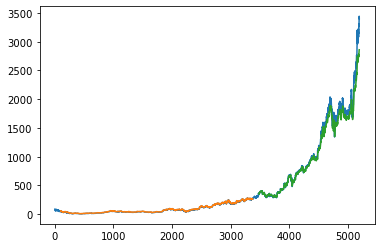

In [46]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
len(test_data)

1819

In [48]:
x_input=test_data[1719:].reshape(1,-1)
x_input.shape


(1, 100)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.5837310728745727,
 0.5928699320663018,
 0.592800083809803,
 0.6295039570038061,
 0.6628141855076929,
 0.6699040322390672,
 0.6991570931442046,
 0.6894972853334304,
 0.694913687213529,
 0.675853071485102,
 0.6861473402137582,
 0.6966133518070714,
 0.6997479255478545,
 0.689788331578211,
 0.6717667708393897,
 0.6888307780638891,
 0.7183108635667007,
 0.6636058227667504,
 0.6723226435866841,
 0.6728494543432277,
 0.6825878503245897,
 0.6873464848492358,
 0.6908390397866019,
 0.6993928576559677,
 0.6842438864038998,
 0.6874366551823965,
 0.6935283042461253,
 0.6996198822536419,
 0.7044163186831277,
 0.7111307754459534,
 0.7252784936132551,
 0.7103769400917356,
 0.7075071928534664,
 0.7031357436285783,
 0.6997973806714792,
 0.6970936207446865,
 0.709105104951275,
 0.7174493780511443,
 0.7178480744572633,
 0.7195914386212501,
 0.7144108723091267,
 0.7209302797697252,
 0.7328806556339038,
 0.7552330214442893,
 0.7687928205126373,
 0.7427470949094782,
 0.7389809735555093,
 0.747031287105901

In [51]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

[0.84380263]
101
1 day input [0.59286993 0.59280008 0.62950396 0.66281419 0.66990403 0.69915709
 0.68949729 0.69491369 0.67585307 0.68614734 0.69661335 0.69974793
 0.68978833 0.67176677 0.68883078 0.71831086 0.66360582 0.67232264
 0.67284945 0.68258785 0.68734648 0.69083904 0.69939286 0.68424389
 0.68743666 0.6935283  0.69961988 0.70441632 0.71113078 0.72527849
 0.71037694 0.70750719 0.70313574 0.69979738 0.69709362 0.7091051
 0.71744938 0.71784807 0.71959144 0.71441087 0.72093028 0.73288066
 0.75523302 0.76879282 0.74274709 0.73898097 0.74703129 0.75942697
 0.76690976 0.77069336 0.77681407 0.78810959 0.80283358 0.79409928
 0.79997264 0.78201219 0.77837695 0.80120667 0.83609726 0.83947343
 0.88800248 0.87143615 0.89500798 0.92455493 0.92961044 0.90167
 0.89584907 0.8739828  0.87137206 0.86033269 0.92869076 0.91164998
 0.90047959 0.86748663 0.87399438 0.88746984 0.87149726 0.88115998
 0.88650063 0.91933066 0.90396632 0.91180716 0.93107441 0.93688659
 0.92013978 0.91452257 0.89487987 0.9

In [52]:
print(lst_output)

[[0.8438026309013367], [0.821925699710846], [0.7859399318695068], [0.7471609711647034], [0.7108525633811951], [0.6787595152854919], [0.6511502861976624], [0.6277433037757874], [0.6080328226089478], [0.591408371925354], [0.5772262215614319], [0.5648660659790039], [0.5537776350975037], [0.5435093641281128], [0.5337210893630981], [0.5241814255714417], [0.5147566199302673], [0.5053910613059998], [0.4960879981517792], [0.48688840866088867], [0.4778531491756439], [0.46904879808425903], [0.46053579449653625], [0.4523625671863556], [0.4445609450340271], [0.4371460974216461], [0.43011704087257385], [0.42346009612083435], [0.41715148091316223], [0.4111618995666504]]


In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [54]:
import matplotlib.pyplot as plt

In [55]:
len(df1)

5197

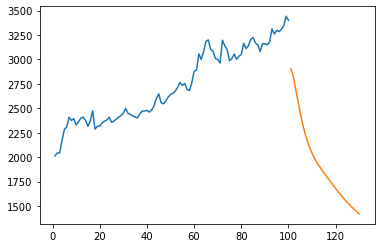

In [56]:
plt.plot(day_new,scaler.inverse_transform(df1[5097:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

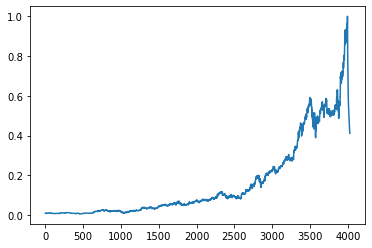

In [57]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [58]:
df3=scaler.inverse_transform(df3).tolist()

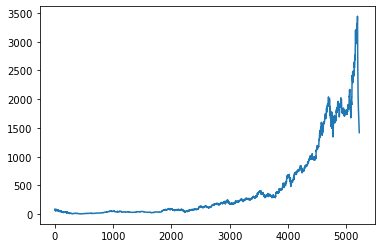

In [59]:
plt.plot(df3)

# ARIMA or Seasonal ARIMA:
* It clear from the plot that the data does not have any seasonality.
* So, ARIMA is chosen.

# Preprocessing the data: Dickey Fuller Stationarity Test

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
# Testing For Stationarity
stationarity_test=adfuller(df['Adj Close'])
stationarity_test

(5.389522985945947,
 1.0,
 33,
 5163,
 {'1%': -3.4316172001143523,
  '5%': -2.8620999693139497,
  '10%': -2.567068071676066},
 42559.23509159204)

In [21]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Adj_Close):
    result=adfuller(Adj_Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [22]:
adfuller_test(df['Adj Close'])

ADF Test Statistic : 5.389522985945947
p-value : 1.0
#Lags Used : 33
Number of Observations Used : 5163
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Comment:
* The variable is non-stationary. That implies it has a unit root.
* What is next? The solution is differencing it. 

# Differencing the non-stationary variable

In [23]:
df['Close_price First Difference'] = df['Adj Close'] - df['Adj Close'].shift(1)

<ipython-input-23-b232f65cc9b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_price First Difference'] = df['Adj Close'] - df['Adj Close'].shift(1)


In [24]:
pd.options.display.max_rows=None

In [25]:
df['Adj Close'].shift(1)

Date
2000-01-03            NaN
2000-01-04      89.375000
2000-01-05      81.937500
2000-01-06      69.750000
2000-01-07      65.562500
2000-01-10      69.562500
2000-01-11      69.187500
2000-01-12      66.750000
2000-01-13      63.562500
2000-01-14      65.937500
2000-01-18      64.250000
2000-01-19      64.125000
2000-01-20      66.812500
2000-01-21      64.750000
2000-01-24      62.062500
2000-01-25      70.125000
2000-01-26      69.250000
2000-01-27      64.812500
2000-01-28      66.937500
2000-01-31      61.687500
2000-02-01      64.562500
2000-02-02      67.437500
2000-02-03      69.437500
2000-02-04      84.187500
2000-02-07      78.562500
2000-02-08      75.000000
2000-02-09      83.125000
2000-02-10      80.250000
2000-02-11      76.187500
2000-02-14      76.187500
2000-02-15      74.437500
2000-02-16      73.812500
2000-02-17      70.687500
2000-02-18      69.000000
2000-02-22      64.750000
2000-02-23      63.562500
2000-02-24      70.437500
2000-02-25      68.437500
2000-02

In [26]:
df

,Adj Close,Close_price First Difference
Date,,
2000-01-03,89.375000,NaN
2000-01-04,81.937500,-7.437500
2000-01-05,69.750000,-12.187500
2000-01-06,65.562500,-4.187500
2000-01-07,69.562500,4.000000
2000-01-10,69.187500,-0.375000
2000-01-11,66.750000,-2.437500
2000-01-12,63.562500,-3.187500
2000-01-13,65.937500,2.375000


In [27]:
## Again test dickey fuller test
adfuller_test(df['Close_price First Difference'].dropna())

ADF Test Statistic : -10.819217519100942
p-value : 1.8237170162138057e-19
#Lags Used : 33
Number of Observations Used : 5162
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

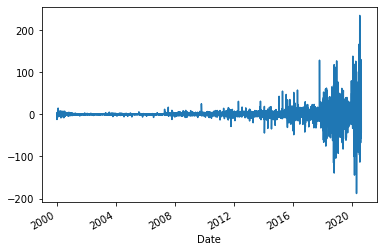

In [28]:
df['Close_price First Difference'].plot()

* Now the varibale is stationary. Well done. Ready for modeling and forcasting.
* As it becomes stationary after it is differenced one time, it is said to be stationary at the first difference. 

## Auto Regressive Model


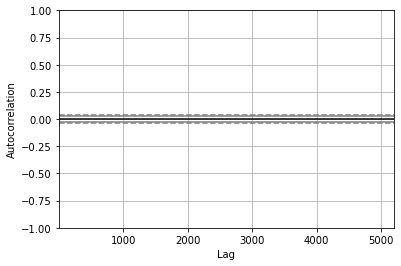

In [29]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
autocorrelation_plot(df['Close_price First Difference'])
plt.show()

# Model Selection: Determining the Lag Order or Lag Length for ARIMA model (p, d, q)
* Use partial autocorrelation to pic the lag order(p) for AR
* Use the autocorrelation to choose the lag order (q) of MA
* use Dickey Fuller Test to determine the integration order (d)

In [30]:
#import statsmodels as sm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

* p=2, d=1, q=0 

# Fit the Model

In [116]:
model=ARIMA(sp500['Adj Close'],order=(2,1,0),seasonal_order=(2,1,0,12))
model_fit=model.fit()

TypeError: __new__() got an unexpected keyword argument 'seasonal_order'

In [102]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 5196
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -22945.206
Method:                       css-mle   S.D. of innovations             20.025
Date:                Sun, 30 Aug 2020   AIC                          45898.412
Time:                        00:14:26   BIC                          45924.635
Sample:                             1   HQIC                         45907.585
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3918      0.252      1.556      0.120      -0.102       0.885
ar.L1.D.Adj Close    -0.1533      0.014    -11.055      0.000      -0.180      -0.126
ar.L2.D.Adj Close     0.0502      0.014      3.618      0.000       0.023       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1909           +0.0000j            3.1909            0.5000
AR.2            6.2456           +0.0000j            6.2456            0.0000
-----------------------------------------------------------------------------
"""

# Forcasting the stock price

In [103]:
sp500.shape

(5197, 4)

<ipython-input-105-44f80f150e67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500['Forcasted Adj_close']=model_fit.predict(start=4000,end=5196,dynamic=True)


<AxesSubplot:xlabel='Date'>

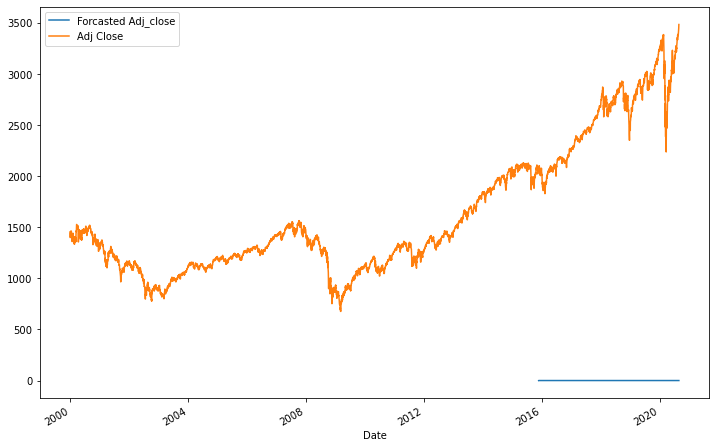

In [105]:
sp500['Forcasted Adj_close']=model_fit.predict(start=4000,end=5196)
sp500[['Forcasted Adj_close','Adj Close']].plot(figsize=(12,8))